# Pre-processing

In [3]:
import json
import os
import numpy as np
import skimage.draw
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd
import scipy.ndimage
import scipy.misc
from skimage import filters
from numpy import asarray
from skimage import measure
from PIL import Image
from tqdm import tqdm
from numpy import array
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.draw import circle
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon
from shapely.geometry import Point
from shapely.ops import cascaded_union


In [9]:
# Reading annotations

with open('/home/waqas/projects/unet/testset/via_region_data.json') as f:
    data = json.load(f)

In [10]:
# Saving binary masks


j = 0

for attr, val in data.items():
    mask = np.zeros((256, 256), dtype=np.uint8)
    for attr2, val2 in val.items():
        if attr2 == 'regions':
            for i in val2:
                print(i['shape_attributes'])
                try:
                    rr ,cc = skimage.draw.circle(i['shape_attributes']['cy'], i['shape_attributes']['cx'], i['shape_attributes']['r'])
                    mask[rr, cc] = 255
                except Exception as e: 
                    print('doof')
                
    img = Image.fromarray(mask)
    plt.show(img)
    img.save(attr[:-5])

{'name': 'circle', 'cx': 73, 'cy': 56, 'r': 23}
{'name': 'circle', 'cx': 90, 'cy': 163, 'r': 13}
{'name': 'circle', 'cx': 45, 'cy': 180, 'r': 12}
{'name': 'circle', 'cx': 33, 'cy': 131, 'r': 5}
{'name': 'circle', 'cx': 120, 'cy': 161, 'r': 8}
{'name': 'circle', 'cx': 134, 'cy': 187, 'r': 7}
{'name': 'circle', 'cx': 6, 'cy': 193, 'r': 6}
{'name': 'circle', 'cx': 224, 'cy': 54, 'r': 11}
{'name': 'circle', 'cx': 191, 'cy': 124, 'r': 8}
{'name': 'circle', 'cx': 8, 'cy': 39, 'r': 6}
{'name': 'circle', 'cx': 38, 'cy': 103, 'r': 6}
{'name': 'circle', 'cx': 121, 'cy': 244, 'r': 5}
{'name': 'circle', 'cx': 232, 'cy': 213, 'r': 6}
{'name': 'circle', 'cx': 220, 'cy': 86, 'r': 7}
{'name': 'circle', 'cx': 207, 'cy': 33, 'r': 8}
{'name': 'circle', 'cx': 29, 'cy': 84, 'r': 7}
{'name': 'circle', 'cx': 59, 'cy': 167, 'r': 12}
{'name': 'circle', 'cx': 175, 'cy': 153, 'r': 5}
{'name': 'circle', 'cx': 179, 'cy': 162, 'r': 15}
{'name': 'circle', 'cx': 227, 'cy': 3, 'r': 16}
{'name': 'circle', 'cx': 66, 'cy

# Post processing

In [71]:
# Converting from gray image to binary and save with same filename 

files = glob.glob('/home/waqas/projects/unet/*predict.png')

for img in files:
    images = cv2.imread(img, 0)
    res, thresh = cv2.threshold(images,20,255,cv2.THRESH_TOZERO)
# To visualise if binaries are correct 
#     titles = ['Original Image','BINARY']
#     images = [img, thresh]
#     for i in range(2):
#         plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
#         plt.title(titles[i])
#         plt.xticks([]),plt.yticks([])
#         plt.show()
    cv2.imwrite(img, thresh)

64


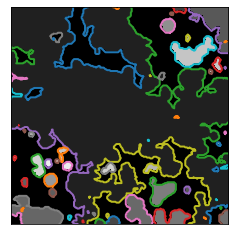

39


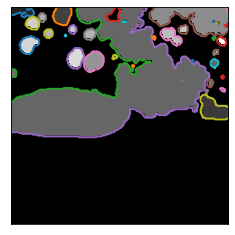

70


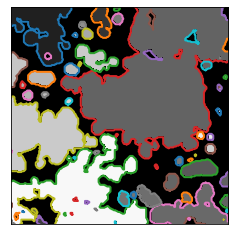

79


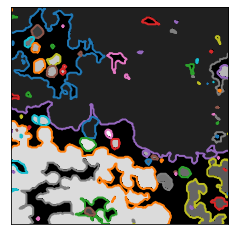

58


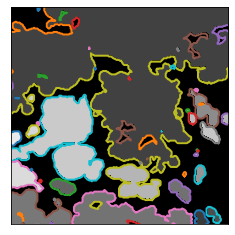

9


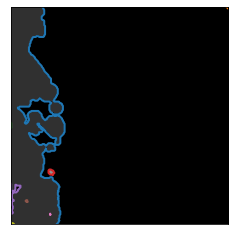

70


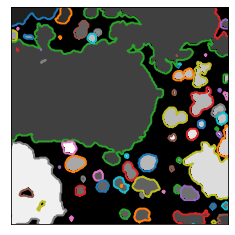

76


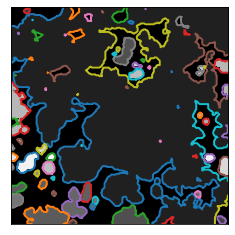

18


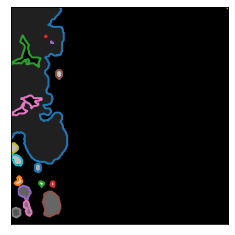

49


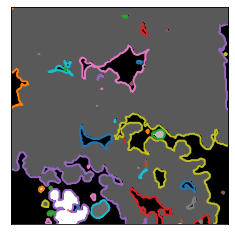

74


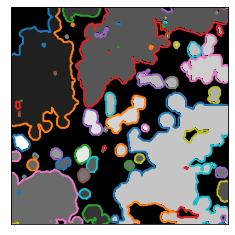

67


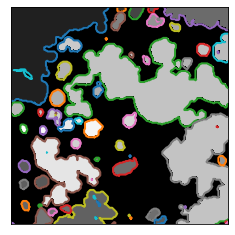

26


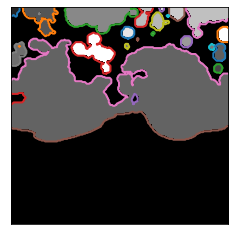

12


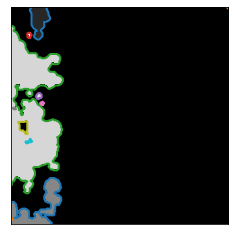

62


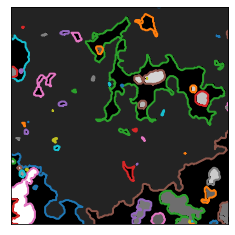

23


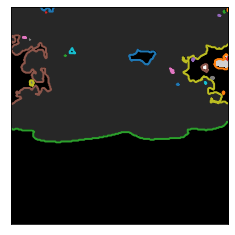

75


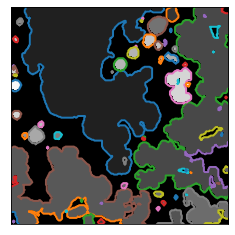

74


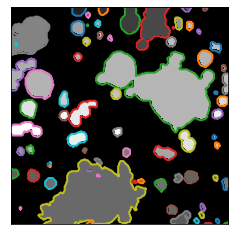

77


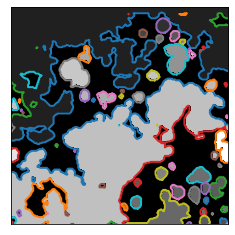

44


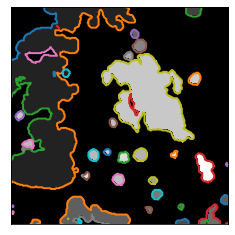

19


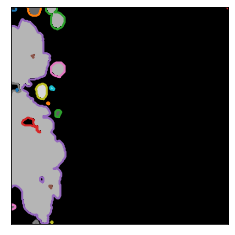

65


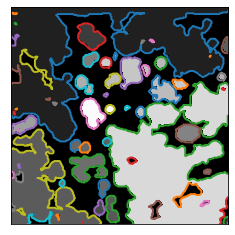

59


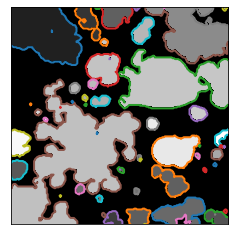

79


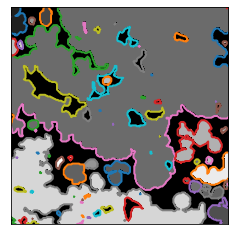

79


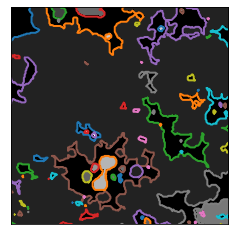

29


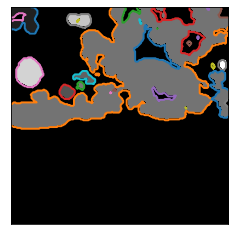

17


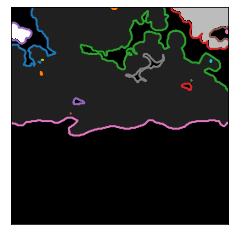

19


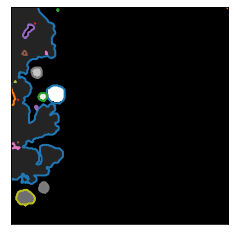

81


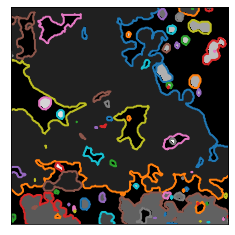

55


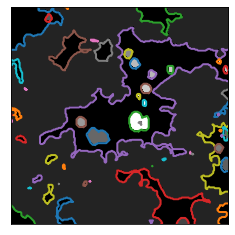

58


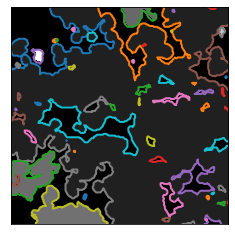

67


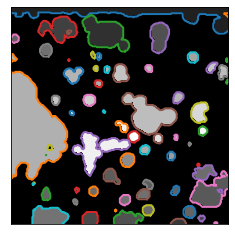

88


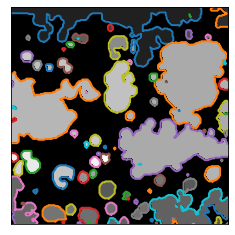

31


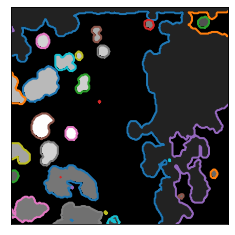

24


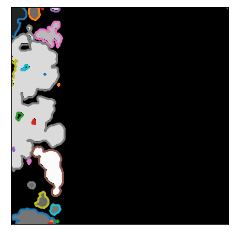

75


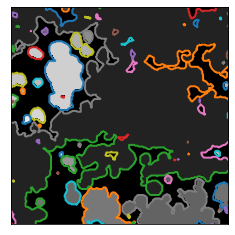

10


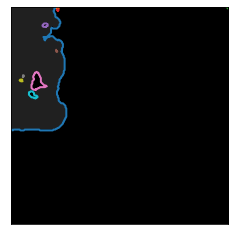

65


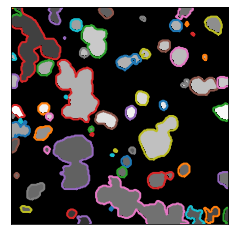

54


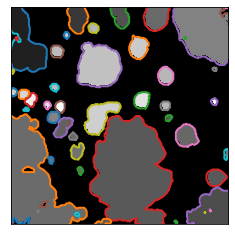

71


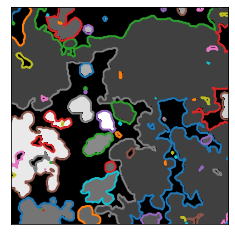

73


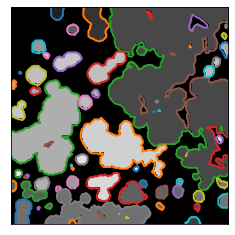

72


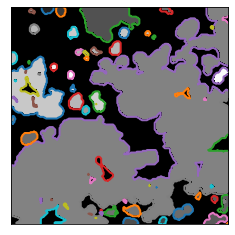

65


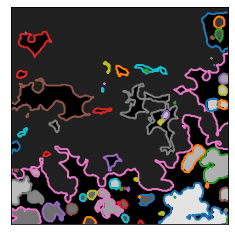

64


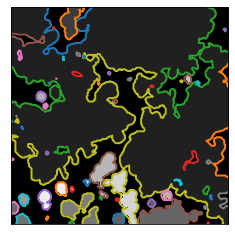

70


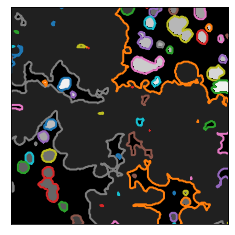

65


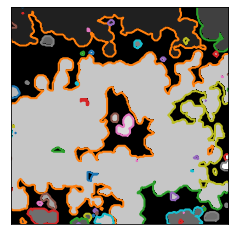

23


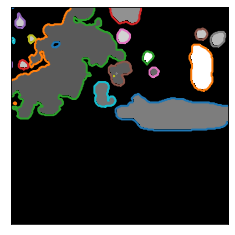

60


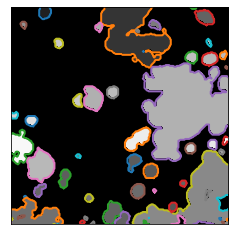

26


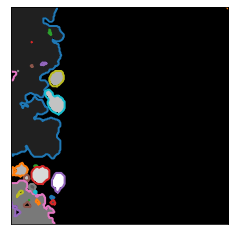

92


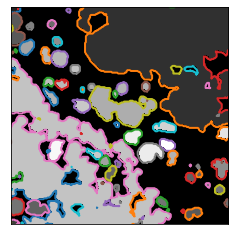

76


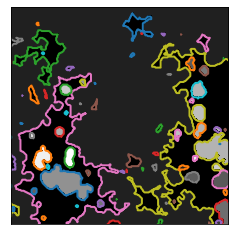

71


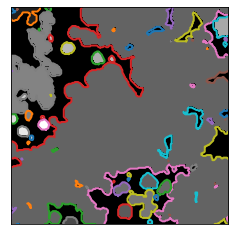

69


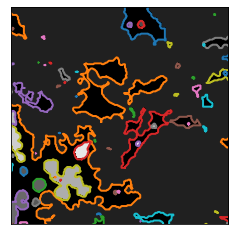

52


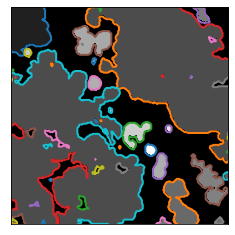

59


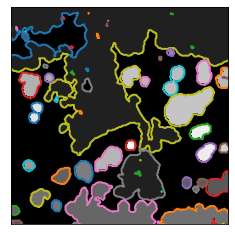

65


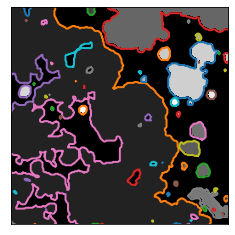

24


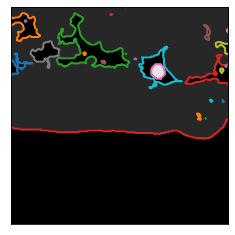

58


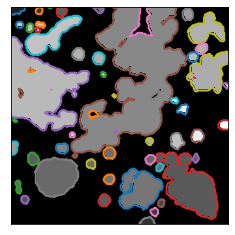

49


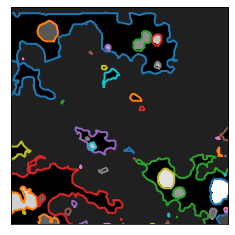

86


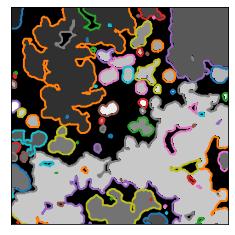

62


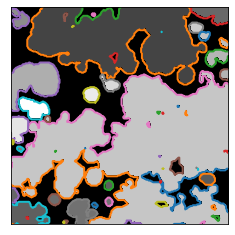

27


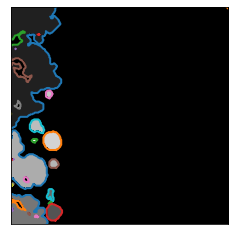

In [72]:
files = glob.glob('/home/waqas/projects/unet/*predict.png')


for i in files:
    img_cont = cv2.imread(i, 0)

    # Find contours at a constant value of 0.8
    contours = measure.find_contours(img_cont, 0.8)
    
    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(img_cont, interpolation='nearest', cmap=plt.cm.gray)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    print(len(contours))
    plt.show()
    label_count, label_map = cv2.connectedComponents(img_cont)    
    color_list = [(255,0,0),(0,255,0), (0,0,255)]
    color_map = plt.cm.get_cmap('hsv')
    color_list = color_map(np.linspace(0, 1, label_count)) * 255
    
#     print(color_list)
    color_map = label2rgb(label_map, img_cont, color_list, alpha=1.0, bg_label=0, bg_color=[0,0,0])
    cv2.imwrite(i, color_map)

    

In [27]:
# Experiment on a single image to display contours

# img = cv2.imread('test.png', 0)
# con = measure.find_contours(img, 0.8)

# fig, ax = plt.subplots()
# ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)

# for n, contour in enumerate(con):
#     ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
#     print(contour.shape)

# ax.axis('image')
# ax.set_xticks([])
# ax.set_yticks([])
# plt.savefig('contour.png')
# plt.show()
# print(len(con))
# cv2.imwrite('contour.png', con)

In [24]:
# label_count, label_map = cv2.connectedComponents(img)
# cv2.imwrite('label.png', label_map)

In [26]:
# from skimage.color import label2rgb
# color_list = [(255,0,0),(0,255,0), (0,0,255)]
# color_map = plt.cm.get_cmap('hsv')
# color_list = color_map(np.linspace(0, 1, label_count)) * 255
# print(color_list)
# color_map = label2rgb(label_map, img, color_list, alpha=1.0, bg_label=0, bg_color=[0,0,0])
# cv2.imwrite("color_map.png", color_map)

In [25]:
# from matplotlib import cm
# cm.get_cmap('hsv')
# plt.imshow(label_map, cmap=plt.get_cmap('hsv'))

Label 	Largest side
    1         256.00
    2          16.00
    3           6.00
    4          15.00
    5          13.00
    6          26.00
    7          12.00
    8          19.00
    9          58.00
   10          11.00
   11           3.00
   12          46.00
   13          20.00
   14          32.00
   15          14.00
   16          12.00
   17           7.00
   18         148.00
   19           3.00
   20           9.00
   21          19.00
   22           9.00
   23          30.00
   24          18.00
   25          16.00
   26           4.00
   27          30.00
   28          81.00
   29           4.00
   30           3.00
(256, 256)
(256, 256) blobs shape


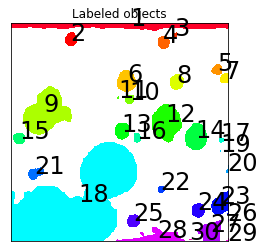

In [55]:
# TEST CODE FOR BLOBS

img = cv2.imread('/home/waqas/projects/unet/1_predict.png', 0)
blobs = img > 10


labels, nlabels = scipy.ndimage.label(blobs)
properties = regionprops(labels)
print ('Label \tLargest side')
for p in properties:
    min_row, min_col, max_row, max_col = p.bbox
    print ('%5d %14.2f' % (p.label, max(max_row - min_row, max_col - min_col)))
    
r, c = np.vstack(scipy.ndimage.center_of_mass(img, labels, np.arange(nlabels) + 1)).T
print(img.shape)
print(blobs.shape, 'blobs shape')
# print(labels.shape)
# print(blobs.shape)
# for blob in blobs:
#     print(blob)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(np.ma.masked_array(labels, ~blobs), cmap=plt.cm.gist_rainbow) 
# print(type(np.ma.masked_array(labels, ~blobs)))
# print(len(labels))
# print(len(~blobs))
ax.set_title('Labeled objects')
plt.xticks([])
plt.yticks([])
for ri, ci, li in zip(r, c, range(1, nlabels+1)):
    ax.annotate(li, xy=(ci, ri), fontsize=24)
plt.savefig('crater_dia.png')
plt.show()

In [5]:
# Experiments with manual threshold adjustment

import scipy.ndimage
from skimage.measure import regionprops


li = []
for i in glob.glob('/home/waqas/projects/unet/'):
    img = cv2.imread(i, 0)
    blobs = img > 0.1
    labels, nlabels = scipy.ndimage.label(blobs)
    properties = regionprops(labels)
    for p in properties:
        min_row, min_col, max_row, max_col = p.bbox
        s = ('%5d %14.1f' % (p.label, max(max_row - min_row, max_col - min_col)))
        li.append(s)
df = pd.DataFrame(li,  columns=['Number_craters'])
df2 = pd.DataFrame(df.Number_craters.str.split().tolist(), columns="number dia".split())
df2.to_csv('crater.txt', sep='\t',index=False)

In [5]:
# # Finding blob coordinates and creating dataframe

# col = []
# img = '/home/waqas/projects/unet/clahe_original_A17/A17_prediction.png'
# img = cv2.imread(img, 0)
# blobs = img > 30
# labels, nlabels = scipy.ndimage.label(blobs)
# properties = regionprops(labels)
# #     print ('Label \tLargest side')
# for p in properties:
#     min_row, min_col, max_row, max_col = p.bbox
#     s = ('%5d %14.2f %14.2d %14.2d' % (p.label, max(max_row - min_row, max_col - min_col), ((max_row - min_row)/2 + min_row), ((max_col - min_col)/2 + min_col)))
#     col.append(s)
# df = pd.DataFrame(col,  columns=['number_craters'])
# df = pd.DataFrame(df.number_craters.str.split().tolist(), columns=['number', 'dia', 'y', 'x'])
# df.to_csv('crater_twiceClahe_original_A17.txt', sep='\t',index=False)

In [7]:
# adaptive thresh mean
import cv2
import numpy as np

img = cv2.imread('/home/waqas/projects/unet/crop_increased.png', 0)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY,11,9)
th2

array([[255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
# adaptive thresh gaussian
import cv2
import numpy as np
from skimage import filters
import os


col = []
img = cv2.imread('/home/waqas/projects/unet/crop_increased.png', 0)
img_otsu = filters.threshold_mean(img)
print(type(img))
print(img_otsu)
blobs = img > img_otsu
labels, nlabels = scipy.ndimage.label(blobs)
properties = regionprops(labels)
for p in properties:
    min_row, min_col, max_row, max_col = p.bbox
    s = ('%5d %14.2f %14.2d %14.2d' % (p.label, max(max_row - min_row, max_col - min_col), ((max_row - min_row)/2 + min_row), ((max_col - min_col)/2 + min_col)))
    col.append(s)
df = pd.DataFrame(col,  columns=['number_craters'])
df = pd.DataFrame(df.number_craters.str.split().tolist(), columns=['number', 'dia', 'y', 'x'])
df = df.drop('number', axis=1)
df.to_csv('crater.txt', header=False, sep='\t',index=False)


<class 'numpy.ndarray'>
30.494856544985836


In [8]:
# Functions to consider craters as polygons and calculating IOU based on polygon overlap

def boolstr_to_floatstr(blobs):
    blobs = np.multiply(blobs, 1)
    return blobs*255

def apply_filter(img, filterName):
    if filterName == 'otsu':
        filtered = filters.threshold_otsu(img)
        
    elif filterName == 'li':
        filtered = img > filters.threshold_li(img)
        
    elif filterName == 'mean':
        filtered = img > filters.threshold_mean(img)
        
    elif filterName == 'isodata':
        filtered = img > filters.threshold_isodata(img)
        
    elif filterName == 'sauvola':
        filtered = img > filters.threshold_sauvola(img)
        
    elif filterName == 'niblack':
        filtered = img > filters.threshold_niblack(img)
        
    elif filterName == 'yen':
        filtered = img > filters.threshold_yen(img)
    else:
        print('Provide right filter name')
    return filtered

def extract_circles(path, filterName, saveIntermediate):
    col = []
    img, threshold = apply_filter(path, filterName)
    blobs = img > threshold
    labels, nlabels = scipy.ndimage.label(blobs)
    if saveIntermediate == 'True':
        float_var = boolstr_to_floatstr(blobs)
        cv2.imwrite('inter' + os.path.basename(path), float_var)
    properties = regionprops(labels)
    for p in properties:
        min_row, min_col, max_row, max_col = p.bbox
        s = ('%5d %14.2f %14.2d %14.2d' % (p.label, max(max_row - min_row, max_col - min_col), ((max_row - min_row)/2 + min_row), ((max_col - min_col)/2 + min_col)))
        col.append(s)
    df = pd.DataFrame(col,  columns=['number_craters'])
    df = pd.DataFrame(df.number_craters.str.split().tolist(), columns=['number', 'dia', 'y', 'x'])
    df = df.drop('number', axis=1)
    df = df.to_csv(os.path.splitext(path)[0] + '.txt', header=False, sep='\t',index=False)
    return df

def polygon_iou(poly_gt, poly_pr):
    if poly_gt.is_valid and poly_pr.is_valid:
        polyAnd = poly_pr.intersection(poly_gt)
        overlap = polyAnd.area / (poly_pr.area - polyAnd.area + poly_gt.area)
    return overlap

def plot_coords(coords):
    pts = list(coords)
    x,y = zip(*pts)
    plt.plot(x,y)
     
def plot_polys(polys):
    for poly in polys:
        if (not getattr(poly, "exterior", None)):
            print("got line?")
        
        plot_coords(poly.exterior.coords)

        for hole in poly.interiors:
            plot_coords(hole.coords)
                     
def get_polygon_list(df):
    polylist = []
    for index, row in df.iterrows():
        gt = Point(row[2],row[1])
        poly = gt.buffer(row[0]/2)
        polylist.append(poly)
    return polylist

def calc_f1(df_gt, df_pr, overlap):
    tp = len(overlap)
    fp = len(df_pr) - tp
    fn = len(df_gt) - tp
    p = tp/ (tp + fp)
    r = tp/ (tp + fn)
    f1 = 2 * (p * r)/(p + r)
    return f1

def get_polygon(df):
    for index, row in df.iterrows():
        gt = Point(row[2],row[1])
        poly = gt.buffer(row[0]/2)
    return poly
    

In [16]:
# creating text file of overlapped craters 

li_ = []

for index, row in tqdm(df_gt.iterrows()):
    gt = Point(row[2],row[1])
    poly_gt = gt.buffer(row[0]/2)

    for indexes, rows in df_pr.iterrows(): 
        pr = Point(rows[2], rows[1])
        poly_pr = pr.buffer(rows[0]/2)
        if poly_gt.is_valid and poly_pr.is_valid:
            polyAnd = poly_gt.intersection(poly_pr)
            overlap = polyAnd.area / (poly_pr.area - polyAnd.area + poly_gt.area)
        if overlap > 0.40:
            s = overlap, index, indexes
            li_.append(s)
        else:
            pass
li_ = np.array(li_)
print(li_.shape)

df = pd.DataFrame(np.array(li_).reshape(li_.shape[0],li_.shape[1]))
df.to_csv('/home/waqas/projects/unet/testset/otsu/otsu_overlap_1.txt', sep='\t', header=None)

(7, 3)


In [49]:
# CLAHE application

os.chdir(r"/home/waqas/projects/unet/") 


def contrast(img):
    img = cv2.imread(img, 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    return cl1


imgs = glob.glob('/home/waqas/projects/unet/*.png')

c = 0
for i in imgs:
    j = contrast(i)
    cv2.imwrite("hist%s.png" % c, j)
    c +=1


In [6]:
# Rough code

# img = cv2.imread('/home/waqas/projects/unet/crop_increased.png', 0)
# col = []
# li = []
# # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_otsu = filters.threshold_mean(img)
# # cv2.imwrite('otsu.png', img_otsu)
# print(img_otsu)
# # threshold = apply_filter(img, filterName)
# blobs = img > img_otsu
# float_var = boolstr_to_floatstr(blobs)
# # cv2.imwrite('/home/waqas/projects/unet/yablayen.png', float_var)
# labels, nlabels = scipy.ndimage.label(blobs)
# properties = regionprops(labels)
# for p in properties:
#     min_row, min_col, max_row, max_col = p.bbox
#     s = ('%5d %14.2f %14.2d %14.2d' % (p.label, max(max_row - min_row, max_col - min_col), ((max_row - min_row)/2 + min_row), ((max_col - min_col)/2 + min_col)))
#     col.append(s)
# df_pr = pd.DataFrame(col,  columns=['number_craters'])
# df_pr = pd.DataFrame(df_pr.number_craters.str.split().tolist(), columns=['number', 'dia', 'y', 'x'])
# df_pr = df_pr.drop('number', axis=1)
# df_pr['dia'] = df_pr['dia'].where(df_pr['dia'].astype(float) > 10)
# df_pr = df_pr.dropna()
# df_pr.to_csv('/home/waqas/projects/unet/cropped_increased_mean.txt', header=False, sep='\t',index=False)
    
#     for index, row in df_gt.iterrows():
#         gt = Point(row[2],row[1])
#         poly_gt = gt.buffer(row[0]/2)
        
#         for index_pr, row_pr in df_pr.iterrows():
#             pr = Point(row_pr[2],row_pr[1])
#             poly_pr = pr.buffer(row_pr[0]/2)
#             overlap = polygon_iou(poly_gt, poly_pr)
#         if overlap > 0.45:
#             f = overlap, threshold_new, index, index_pr
#             li.append(f)
#     f1 = calc_f1(df_gt, df_pr, overlap)
#     li = np.array(li)
    
# final = pd.DataFrame(np.array(li).reshape(li.shape[0],li.shape[1]))
# df.to_csv('/home/waqas/projects/unet/final_score_otsu.txt', sep='\t', header=None)
    

30.494856544985836


In [69]:
# Rough code

gt_df = pd.read_csv('/home/waqas/projects/unet/test/gt_hcon.txt', sep='\t', header=None)
pr_df = pd.read_csv('/home/waqas/projects/unet/test/predictions/13.txt', sep='\t', header=None)

gt = get_polygon_list(gt_df)
pr = get_polygon_list(pr_df)

li = []
for polygt in gt:
    for polypr in pr:
        overlap = polygon_iou(polygt, polypr)
        if overlap > 0.40:
            li.append(overlap)
print(len(li))

25


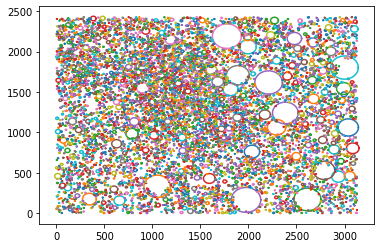

In [56]:
# Polygon visualization

tsv = pd.read_csv('/home/waqas/projects/unet/test/test_greater/g12.txt', sep='\t', header=None)

def get_polygon(tsv):
    polylist = []
    for index, row in tsv.iterrows():
        gt = Point(row[2],row[1])
        poly = gt.buffer(row[0]/2)
        polylist.append(poly)
    return polylist

plot_polys((get_polygon(tsv)))

In [39]:
# Rough code

# tar = pd.read_csv(path, sep='\t', header=None)
# pre = pd.read_csv(path, sep='\t', header=None)

# li_ = []

# for index, row in tqdm(tar.iterrows()):
#     gt = Point(row[2],row[1])
#     poly_gt = gt.buffer(row[0]/2)

#     for indexes, rows in pre.iterrows(): 
#         pr = Point(rows[2], rows[1])
#         poly_pr = pr.buffer(rows[0]/2)
#         if poly_gt.is_valid and poly_pr.is_valid:
#             polyAnd = poly_pr.intersection(poly_gt)
#             overlap = polyAnd.area / (poly_pr.area - polyAnd.area + poly_gt.area)
#         if overlap > 0.45:
#             s = overlap, index, indexes
#             li_.append(s)
#         else:
#             pass
# li_ = np.array(li_)
# print(li_.shape)

# df = pd.DataFrame(np.array(li_).reshape(li_.shape[0],li_.shape[1]))
# df.to_csv('/home/waqas/projects/unet/crop_increased_score_otsu.txt', sep='\t', header=None)

In [32]:
# s = ('/home/waqas/projects/unet/bullshit.txt')
# # os.path.basename(s)
# # cv2.imwrite('s' + 'blobs.png', blobs)

# base = os.path.splitext(s)[0] + '.aln'
# base

'/home/waqas/projects/unet/bullshit.aln'

In [6]:
# Finding blob coordinates and creating dataframe

col = []
for img in glob.glob('/home/waqas/projects/unet/test/13.png'):
    img = cv2.imread(img, 0)
    blobs = img > img_otsu
    labels, nlabels = scipy.ndimage.label(blobs)
    blobs = boolstr_to_floatstr(blobs)
    properties = regionprops(labels)
    for p in properties:
        min_row, min_col, max_row, max_col = p.bbox
        s = ('%5d %14.2f %14.2d %14.2d' % (p.label, max(max_row - min_row, max_col - min_col), ((max_row - min_row)/2 + min_row), ((max_col - min_col)/2 + min_col)))
        col.append(s)
    df = pd.DataFrame(col,  columns=['number_craters'])
    df = pd.DataFrame(df.number_craters.str.split().tolist(), columns=['number', 'dia', 'y', 'x'])
df = df.drop('number', axis=1)
df.to_csv('/home/waqas/projects/unet/delete.txt', header=False, sep='\t',index=False)

NameError: name 'img_otsu' is not defined

In [6]:
# Projection od detection

df = pd.read_csv('/home/waqas/projects/unet/final_results/otsu/22_predict_otsu.txt', sep='\t', header=None)
df = df[df[0] < 200]

img = np.zeros((256, 256), dtype=np.uint8)
# cv2.imwrite('empty.png', img)

# img = cv2.imread('empty.png', 0)
for index, row in df.iterrows():
    try:
        rr, cc = circle(int(row[1]), int(row[2]), int(row[0]/2))
        img[rr, cc] = 255
    except:
        print(index)
    
    # img = Image.fromarray(img)
    cv2.imwrite('/home/waqas/projects/unet/final_results/otsu/22_predict_otsu_fitted.png', img)


/home/waqas/projects/maskenv/lib/python3.6/site-packages/skimage/draw/draw.py:39: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/home/waqas/projects/maskenv/lib/python3.6/site-packages/skimage/draw/draw.py:40: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


In [16]:
df = pd.read_csv('crater_clahe.txt', sep='\t')
df = df.drop('number', axis=1)
df = df.ix[1:]
df.head() 

/home/waqas/projects/maskenv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,dia,y,x
1,86.0,37,141
2,62.0,13,376
3,16.0,7,496
4,72.0,24,574
5,2477.0,31,1898


In [12]:
# Combining list files, generating a final list 

# filenames = ['129_crater_1.txt', '129_crater_2.txt', '129_crater_3.txt', '129_crater_4.txt', '129_crater_5.txt']
# frames = []

# with open('129_output.txt', 'w') as outfile:
#     for fname in filenames:
#         with open(fname) as infile:
#             outfile.write(infile.read())

In [77]:
poly_gt = Point(123,123).buffer(5.00/2)
poly_pr1 = Point(123,123).buffer(17.00/2)
if poly_pr1.is_valid and poly_gt.is_valid:
    polyAnd = poly_pr1.intersection(poly_gt)
    overlap = polyAnd.area / (poly_pr1.area - polyAnd.area + poly_gt.area)
    print(poly_pr1.area)
else:
    print('no')

226.61562844194427


In [34]:
# combine images
import cv2 
os.chdir('/home/waqas/projects/unet/testset/')

img13 = cv2.imread('182.png')
img14 = cv2.imread('183.png')
img15 = cv2.imread('184.png')
img16 = cv2.imread('185.png')
img17 = cv2.imread('186.png')
# img18 = cv2.imread('18.png')
# img19 = cv2.imread('19.png')
# img20 = cv2.imread('20.png')
# img21 = cv2.imread('21.png')
# img22 = cv2.imread('22.png')
# img23 = cv2.imread('23.png')
# img24 = cv2.imread('24.png')
# img25 = cv2.imread('25.png')
# img26 = cv2.imread('26.png')
# img27 = cv2.imread('27.png')
# img28 = cv2.imread('28.png')
# img29 = cv2.imread('29.png')
# img30 = cv2.imread('30.png')
# img31 = cv2.imread('31.png')
# img32 = cv2.imread('32.png')
# img33 = cv2.imread('33.png')
# img34 = cv2.imread('34.png')
# img35 = cv2.imread('35.png')
# img36 = cv2.imread('36.png')
# img37 = cv2.imread('37.png')
# img38 = cv2.imread('38.png')



im_h1 = cv2.hconcat([img13, img14, img15, img16, img17, img18, img19, img20, img21, img22, img23, img24, img25])
# im_h2 = cv2.hconcat([img26, img27, img28, img28, img29, img30, img31, img32, img33, img34, img35, img36, img37, img38])


cv2.imwrite('hconcat.png', im_h1)
cv2.imwrite('1hcon.png', im_h2)


True

In [106]:
h1 = cv2.imread('hconcat.png')
h2 = cv2.imread('1hcon.png')

imh_v = cv2.vconcat([h1, h2])
cv2.imwrite('final.png', imh_v)

True

In [23]:
# from PIL import Image
# import numpy as np


# # Open the input image as numpy array
# npImage=np.array(Image.open("26.png"))
# # Open the mask image as numpy array
# npMask=np.array(Image.open("yablali.png").convert("RGB"))
# # Make a binary array identifying where the mask is black
# cond = npMask<128

# # Select image or mask according to condition array
# pixels=np.where(cond, npImage, npMask)

# # Save resulting image
# result=Image.fromarray(pixels)
# result.save('result.png')